# Register Creation

In [1]:
import numpy as np
import pulser

With ``Pulser``, it is easy to define a ``Register`` consisting of any arrangement of atoms in a quantum processor. The `Register` class enables the control on the position of the atoms in space. It stores the positions of the atoms and their associated names.

## Direct definition of a `Register`

There are multiple ways of defining a `Register`, the most customizable one being to create a dictionary that associates a name (the key) to a cooordinate (the value):

In [2]:
# Place atoms in a 4x4 square lattice with spacing 5µm
L = 4
square = np.array([[i, j] for i in range(L) for j in range(L)], dtype=float)
square -= np.mean(square, axis=0)
square *= 5

qubits = dict(enumerate(square))
reg = pulser.Register(qubits)

The `Register` class provides some useful features, like the ability to visualise the array and to make a rotated copy.

The original array:


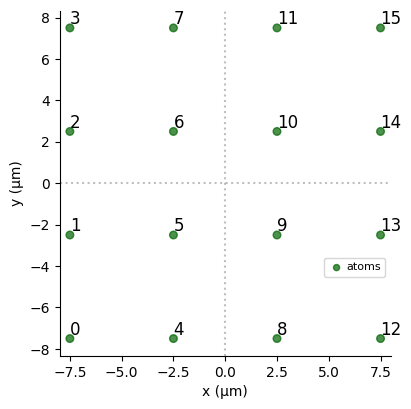

The rotated array:


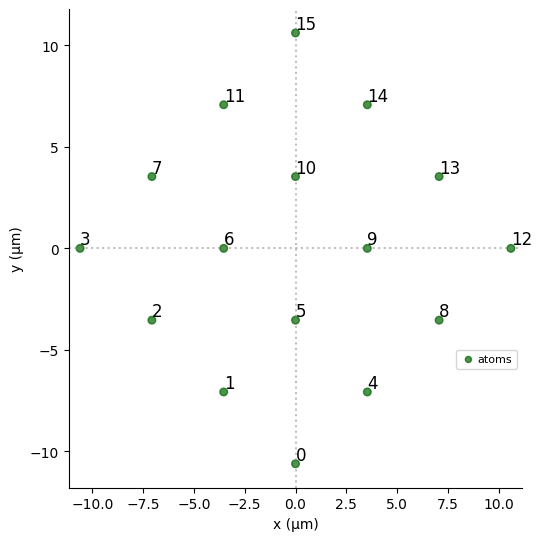

In [3]:
print("The original array:")
reg.draw()
reg1 = reg.rotated(45)  # Rotate by 45 degrees
print("The rotated array:")
reg1.draw()

We can really place the atoms in arbitrary positions. As an exotic example, here is a picture of the Gioconda as a register of neutral atoms made using Pulser:

![download%20%282%29.png](attachment:download%20%282%29.png)

## Automatizing the labelling with `Register.from_coordinates`

If one doesn't particularly care about the name given to the qubits, one can also create a `Register` just from a list of coordinates (using the `Register.from_coordinates` class method). In this case, the qubit ID's are just numbered, starting from 0, in the order they are provided in, with the option of adding a common prefix before each number. Also, it automatically centers the entire array around the origin, an option that can be disabled if desired.

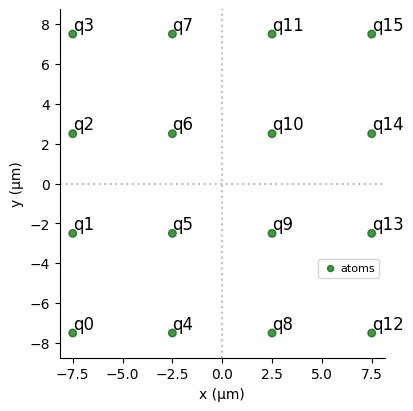

In [4]:
reg2 = pulser.Register.from_coordinates(
    square,
    prefix="q",
)  # All qubit IDs will start with 'q'
reg2.draw()

## Automatizing the pattern's generation

Furthermore, there are also built-in class methods from creation of common array patterns, namely:
- Square lattices in rectangular or square shapes
- Triangular lattices with horizontal rows or in hexagonal shape

We could, thus, create the same square array as before by doing:

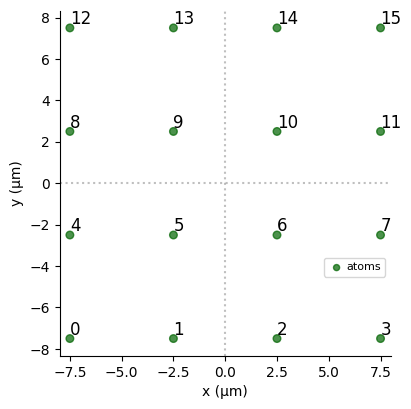

In [5]:
reg3 = pulser.Register.square(4, spacing=5)  # 4x4 array with atoms 5 um apart
reg3.draw()

The `Register` can also be created with a triandular lattice with horizontal rows:

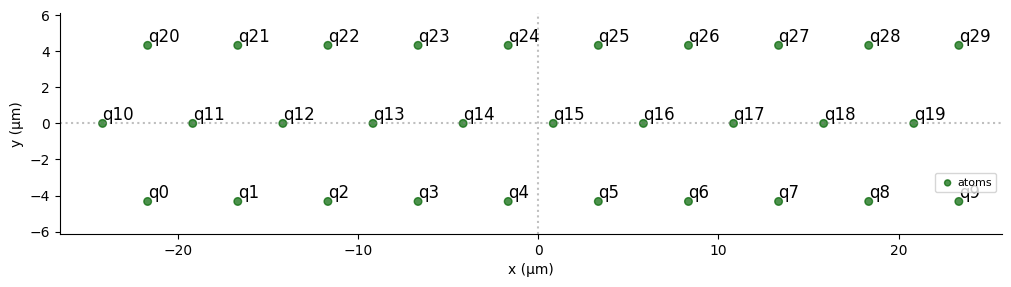

In [7]:
layers = 3
reg5 = pulser.Register.triangular_lattice(
    rows=3,
    atoms_per_row=10,
    spacing=5.0,
    prefix="q",
)
reg5.draw()

Or with a triangular layout in an hexagonal shape (not displaying the labels with `with_labels=False`):

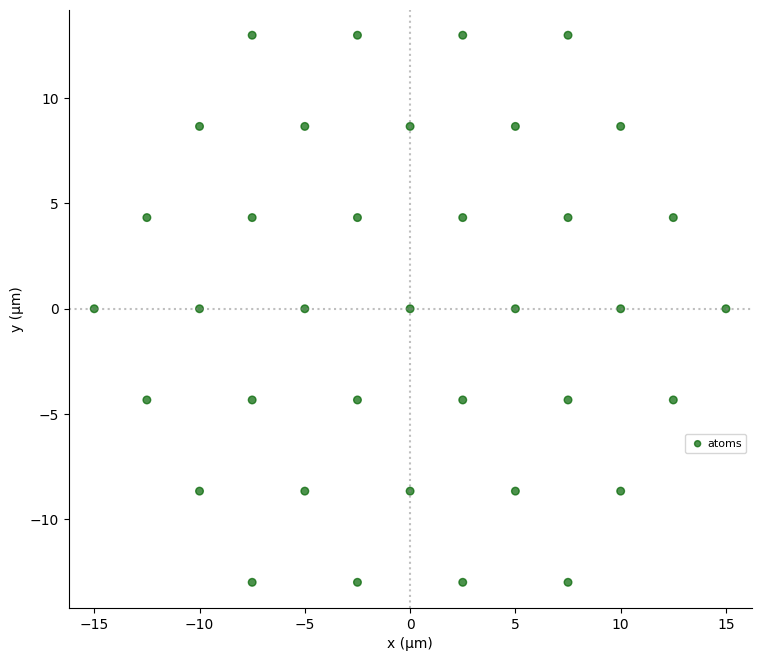

In [6]:
reg4 = pulser.Register.hexagon(layers=3, spacing=5, prefix="")
reg4.draw(with_labels=False)

## Optimizing the `Register` with physical constraints

The `Register` can be generated to optimize the connectivity of the atoms (the atoms are placed in an hexagonal shape in a triangular lattice) under the physical constrains given by a `Device`. This is done by the built-in class method `max_connectivity`:

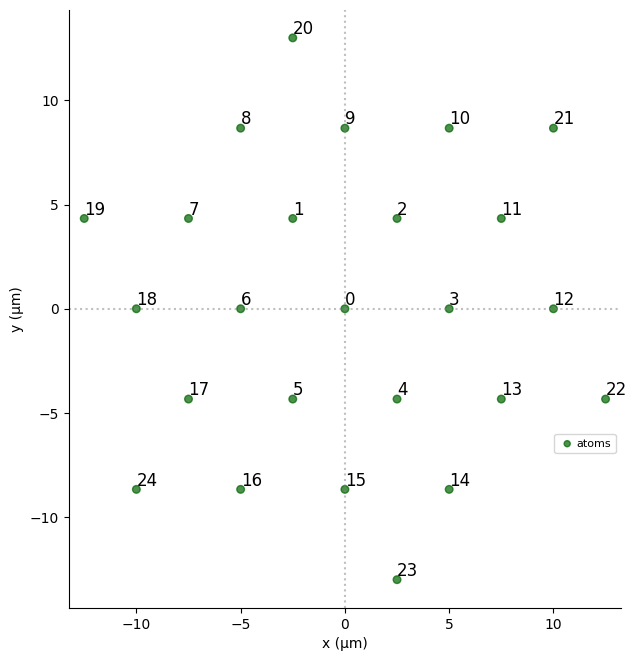

In [11]:
reg5 = pulser.Register.max_connectivity(
    n_qubits=25,
    device=pulser.AnalogDevice,
    spacing=None,
    prefix=None,
)
reg5.draw()

To have a graphical representation of the interactions between the atoms, the half of the rydberg blockade radius can be drawn: if the disks overlap, the Rydberg blockade is expected to happen. You can read more about the **Rydberg Blockade** [in the introduction tutorials](../sequence_introduction/sequence_interaction.ipynb). The `blockade_radius` can be provided in the arguments of `Register.draw`, and asked to be drawn with `draw_half_radius`. If the option `draw_graph` is True, a link is drawn, between the atoms that are placed at less than the blockade radius distance from each other. 

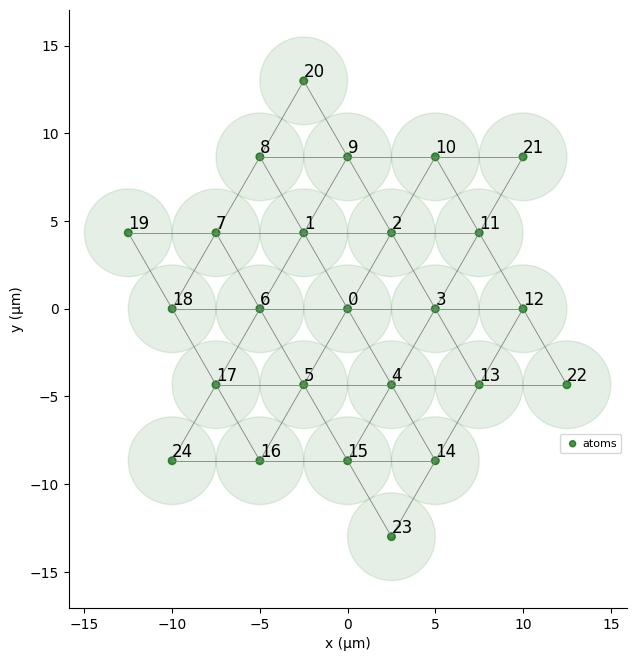

In [15]:
reg5.draw(
    with_labels=True,
    blockade_radius=5,
    draw_graph=True,
    draw_half_radius=True,
)

To be run on a `Device`, a `Sequence` must contain a `Register` defined from a `RegisterLayout`. It is also possible to define abstract `Register`, where the labels are not associated with any coordinates until the `Sequence` is built. `RegisterLayout`, `MappableRegister`, and the creation of `Registers` from these objects is presented [in the next tutorial](./Register%20Layouts.ipynb).  